# K-Means Clustering: Mathematical Interpretation

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, This algorithm requires the number of clusters to be specified. It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

c1=2,4,5 (c1=4)
c2=8,9,10 (c2=9)

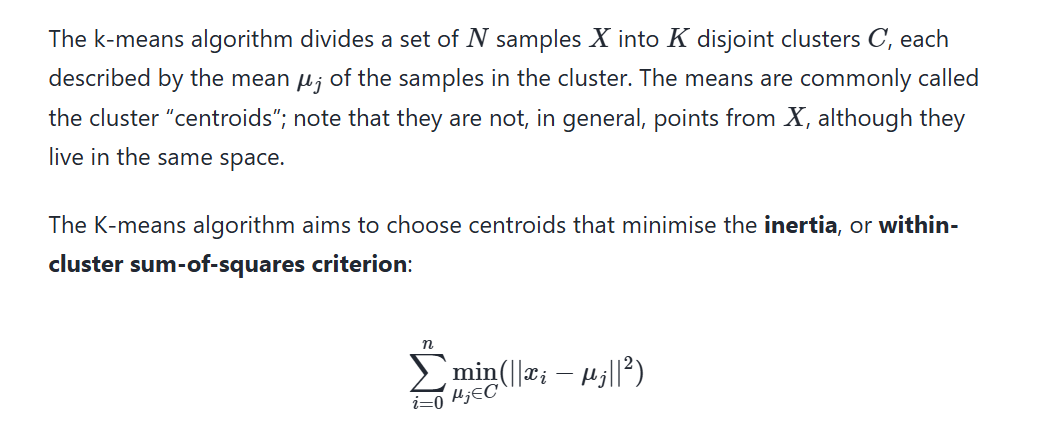


## Step 1: Understanding K-Means Clustering

K-Means is an unsupervised learning algorithm used for clustering data into **K groups** based on feature similarity.

The algorithm follows these steps:

1. Select the number of clusters, **K**.
2. Initialize **K** cluster centroids randomly.
3. Assign each data point to the closest centroid. (Match Centroid with the mean of the Cluster members)
4. Compute new centroids based on the mean of the assigned points.(Ci=ui)
5. Repeat steps 3 and 4 until convergence (centroids do not change).

---

## Step 2: Mathematical Formulation

### 2.1 Distance Calculation (Assigning Points to Clusters)

Each point **\( x_i \)** is assigned to the nearest centroid **\( \mu_j \)** using the **Euclidean Distance**:

\[
d(x_i, \mu_j) = \sqrt{\sum_{m=1}^{n} (x_{im} - \mu_{jm})^2}
\]

where:
- \( x_{im} \) is the **m-th feature** of data point **\( x_i \)**.
- \( \mu_{jm} \) is the **m-th feature** of centroid **\( \mu_j \)**.
- The point \( x_i \) is assigned to the cluster \( C_j \) if:

\[
C(x_i) = \arg \min_{j \in \{1, ..., K\}} d(x_i, \mu_j)
\]

---

### 2.2 Centroid Update Step

After assigning all points to clusters, recompute the centroids as the mean of all points in a cluster:

\[
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
\]

where:
- \( |C_j| \) is the number of points in cluster \( C_j \).
- The new centroid is the **mean** of all assigned points.

---

### 2.3 Objective Function (Minimization of Inertia)

The algorithm minimizes the **within-cluster sum of squared errors (SSE)**, also called inertia:

\[
J = \sum_{j=1}^{K} \sum_{x_i \in C_j} || x_i - \mu_j ||^2
\]

where:
- \( J \) is the total variance (SSE).
- The objective is to minimize \( J \) by adjusting cluster assignments and centroids iteratively.

---

## Step 3: Visualization of K-Means Clustering



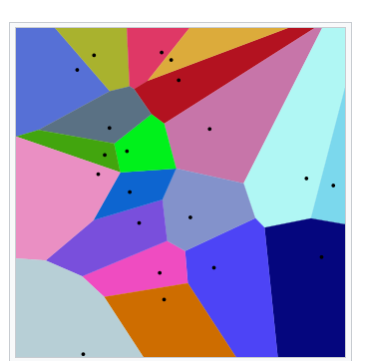

In mathematics, a Voronoi diagram is a partition of a plane into regions close to each of a given set of objects.

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


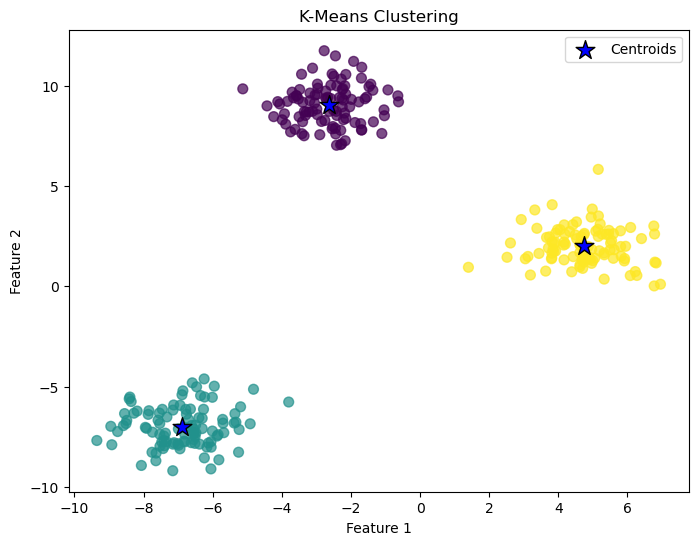

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='blue', marker='*', edgecolors='k', label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### Step 4: Choosing Optimal K using Elbow Method
To determine the best value of K, we use the Elbow Method, which plots inertia (SSE) against different values of K.

C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklea

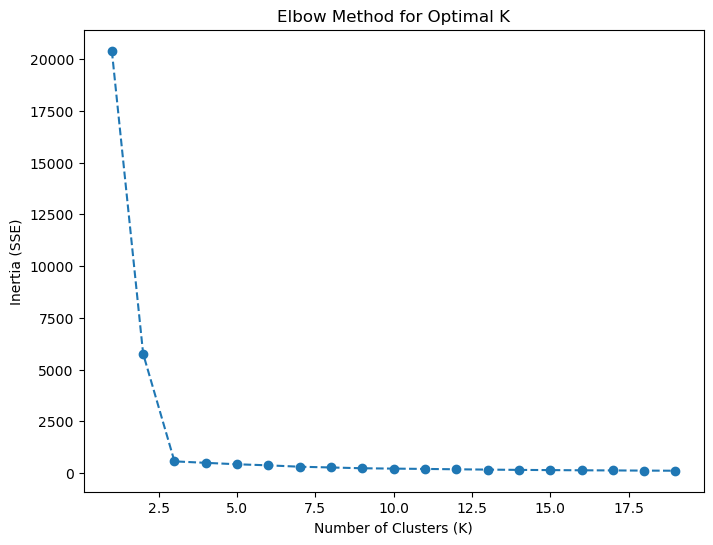

In [4]:
inertia = []
K_range = range(1, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()


### K -means Parameters 
#### n_clusters (int, default=8)

- Number of clusters to form and centroids to generate.
      init (str or ndarray, default='k-means++')

#### Initialization method for centroids:
- 'k-means++': Smart centroid initialization to speed up convergence.
- 'random': Random initialization of centroids.
- ndarray: User-defined initial centroids.

### n_init (int, 'auto', default='auto')

- Number of times the algorithm runs with different centroid seeds.
- 'auto': Uses a sensible default (10 in older versions, 1 in newer ones).

### max_iter (int, default=300)

- Maximum number of iterations for a single run.
tol (float, default=0.0001)

#### Tolerance to determine convergence (change in inertia).

#### verbose (int, default=0)

- Controls the verbosity of the output (0 means silent).

#### random_state (int, RandomState instance, default=None)

- Controls the randomness of centroid initialization (useful for reproducibility).

#### copy_x (bool, default=True)

- If True, a copy of the data is used; if False, data may be modified in place.

#### algorithm (str, default='lloyd')

- Algorithm used for clustering:
- 'lloyd': Standard K-Means algorithm.
- 'elkan': More efficient for dense, small datasets (not compatible with all settings).

In [5]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)


C:\Users\Suyashi144893\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [7]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0])

In [8]:
kmeans.cluster_centers_ 

array([[10.,  2.],
       [ 1.,  2.]])